<a href="https://colab.research.google.com/github/issacridhin/LabWorks/blob/ML/23348546_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

In [2]:
telecocust = pd.read_csv('/content/telecocust.csv')


In [3]:
telecocust

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [40]:
telecocust.describe

<bound method NDFrame.describe of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DS

In [4]:
 telecocust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
telecocust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
#We are going to display the data tye and We are going to check if there are any missing values
telecocust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [9]:
telecocust.TotalCharges = pd.to_numeric(telecocust.TotalCharges, errors='coerce')
telecocust.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
#now we have to remove those 11 rows from Total charges, customerID, and change to binary numeric variable
telecocust.dropna(inplace=True)
df2 = telecocust.iloc[:,1:]
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<Axes: >

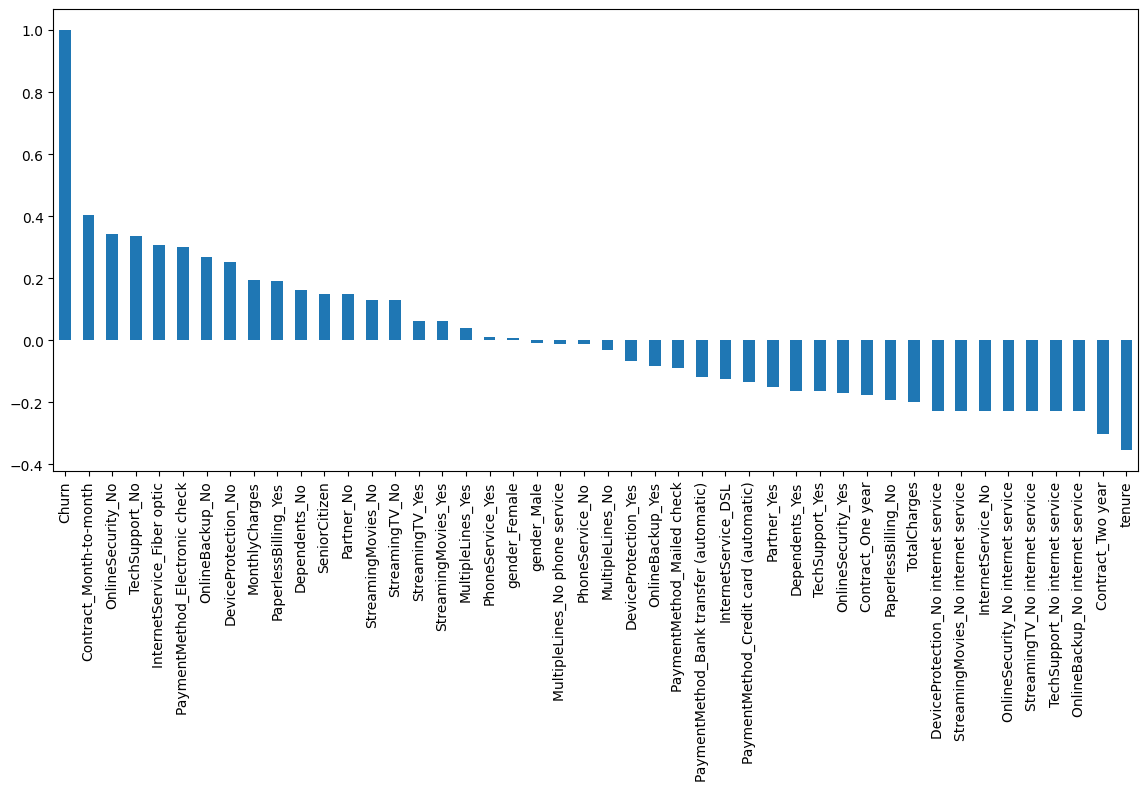

In [11]:
#Correlation of churn with other variables
plt.figure(figsize=(14,6))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [12]:
#Binning the data
feature_to_bin = telecocust[['MonthlyCharges']] #We are choosing MonthlyCharges column from the table
bin_encoder = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
binned_feature = bin_encoder.fit_transform(feature_to_bin)
telecocust['MonthlyCharges_Binned'] = binned_feature


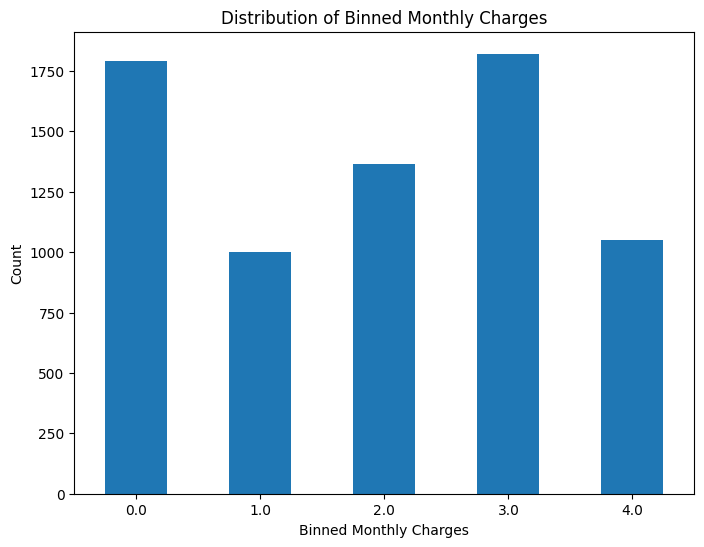

In [13]:
#We plot it to a bar graph with the help of matplotlib
plt.figure(figsize=(8, 6))
telecocust['MonthlyCharges_Binned'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Binned Monthly Charges')
plt.ylabel('Count')
plt.title('Distribution of Binned Monthly Charges')
plt.xticks(rotation=0)
plt.show()

In [ ]:
#Covariance matrix
numeric_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
covariance_matrix = telecocust[numeric_columns].cov()
print("Covariance Matrix:")
print(covariance_matrix)

Covariance Matrix:
                SeniorCitizen        tenure  MonthlyCharges  TotalCharges
SeniorCitizen        0.136046      0.141988        2.439951  8.562397e+01
tenure               0.141988    602.469774      182.299526  4.595074e+04
MonthlyCharges       2.439951    182.299526      905.165825  4.440133e+04
TotalCharges        85.623972  45950.743236    44401.333073  5.138252e+06


<ipython-input-26-1ffb5775270e>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(encoded_data.corr(), annot=True, cmap='coolwarm')


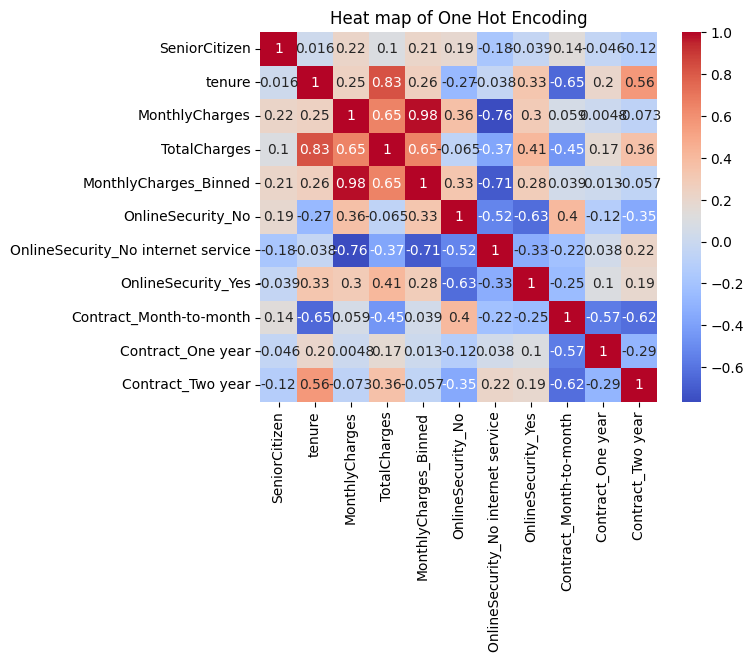

In [26]:
#Performing one hot encoding on the data.
cat_columns = ['OnlineSecurity','Contract']

encoded_data = pd.get_dummies(telecocust, columns=cat_columns)
sn.heatmap(encoded_data.corr(), annot=True, cmap='coolwarm')
plt.title('Heat map of One Hot Encoding')
plt.show()
#print(encoded_data.head())

In [29]:
#We are printing out the encoded data first to get a better idea to proceed with the chi square
print(encoded_data.columns)
print(encoded_data.head())


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'MonthlyCharges_Binned',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year'],
      dtype='object')
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         

In [30]:
#Performing Chi Square Test on the Data
column1 = 'OnlineSecurity_Yes'
column2 = 'Churn'
contingency_table = pd.crosstab(encoded_data[column1], encoded_data[column2])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 205.41578737378245
P-value: 1.37424000884718e-46
Degrees of freedom: 1
Expected frequencies table:
[[3683.55674061 1333.44325939]
 [1479.44325939  535.55674061]]


In [38]:
#Performing T test on the data
numerical_column = 'tenure'
categorical_column = 'Churn'
group1 = encoded_data[encoded_data[categorical_column] == 0][numerical_column]
group2 = encoded_data[encoded_data[categorical_column] == 1][numerical_column]
print("Group 1:", group1)
print("Group 2:", group2)
t_statistic, p_value = ttest_ind(group1, group2)
print("T-statistic:", t_statistic)
print("P-value:", p_value)

Group 1: Series([], Name: tenure, dtype: int64)
Group 2: Series([], Name: tenure, dtype: int64)
T-statistic: nan
P-value: nan


In [41]:
#Performing T test Diff approach
import scipy.stats as stats
tenure_column =telecocust['tenure']
bin_labels = ["1-10", "11-22", "23-33", "34-44", "45-55", "56-66", "67+"]
grp_1=telecocust[(telecocust['tenure']>=35) & (telecocust['tenure']<=44)]['MonthlyCharges']
grp_2=telecocust[(telecocust['tenure']>=45) & (telecocust['tenure']<=54)]['MonthlyCharges']


In [44]:
t_statistic ,p_value = stats.ttest_ind(grp_1, grp_2)
alpha = 0.05
print("t-statistic:", t_statistic)
print("p-value:", p_value)
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in ratings between the tenure groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in ratings between the tenure groups.")

t-statistic: -1.8703255673490469
p-value: 0.0616601211995226
Fail to reject the null hypothesis: There is no significant difference in ratings between the tenure groups.


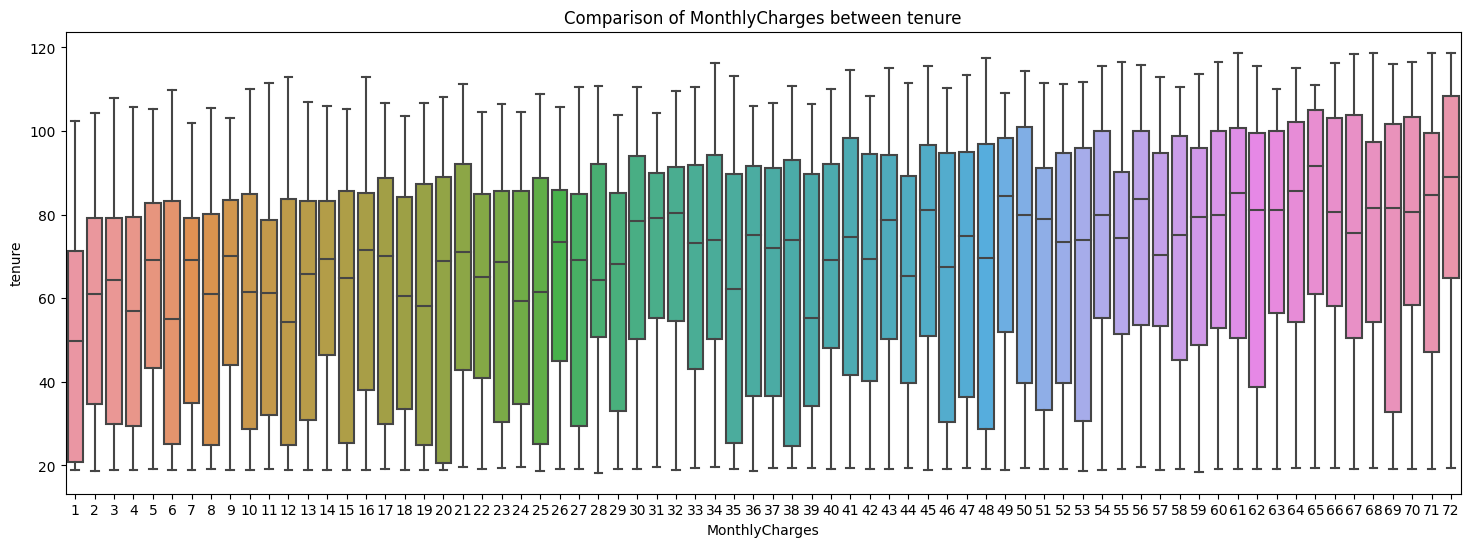

In [46]:
plt.figure(figsize=(18, 6))
sn.boxplot(x=telecocust['tenure'], y=telecocust['MonthlyCharges'])
plt.title("Comparison of MonthlyCharges between tenure")
plt.xlabel("MonthlyCharges")
plt.ylabel("tenure")
plt.show()